In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv("tested.csv")

In [19]:
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [24]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [25]:
df['Age'].fillna(df['Age'].mean())


0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [26]:
df.fillna(df.mode().iloc[0],inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
print(f"Duplicates before: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates after: {df.duplicated().sum()}")

Duplicates before: 0
Duplicates after: 0


In [16]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
3,895,0,3,27.0,0,0,8.6625
5,897,0,3,14.0,0,0,9.2250
6,898,1,3,30.0,0,0,7.6292
...,...,...,...,...,...,...,...
410,1302,1,3,21.0,0,0,7.7500
412,1304,1,3,28.0,0,0,7.7750
413,1305,0,3,21.0,0,0,8.0500
415,1307,0,3,38.5,0,0,7.2500


Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Processing column: Name
Skipping 'Name' due to too many unique values (418).
Processing column: Sex


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11792\845819361.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].fillna('Missing'),  # Handle NaN values


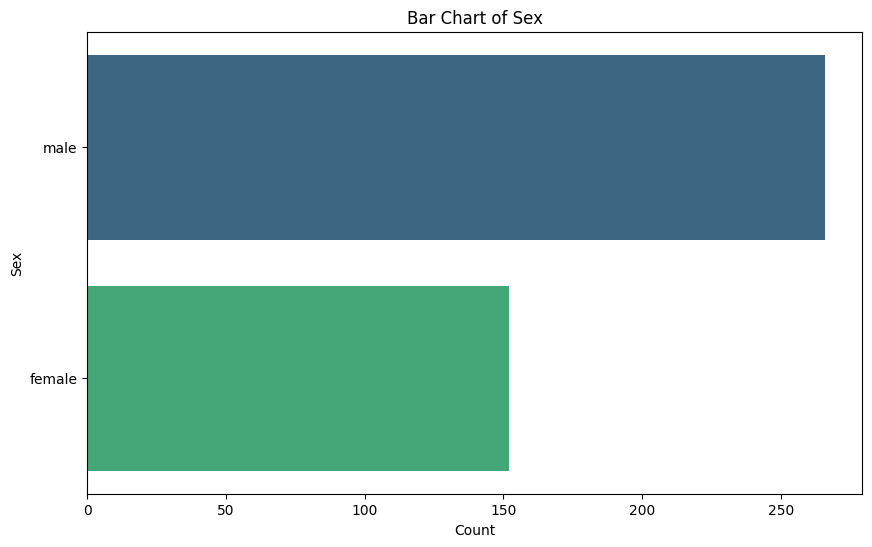

Processing column: Ticket
Skipping 'Ticket' due to too many unique values (363).
Processing column: Cabin
Skipping 'Cabin' due to too many unique values (76).
Processing column: Embarked


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11792\845819361.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].fillna('Missing'),  # Handle NaN values


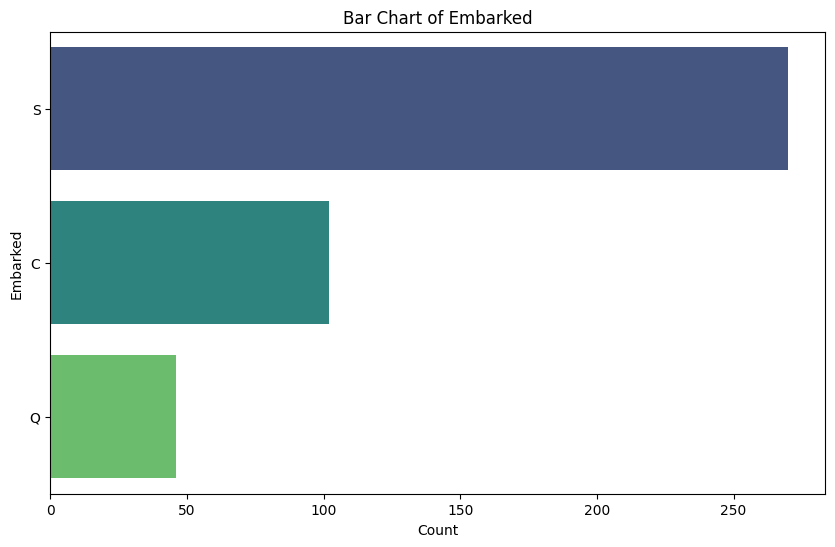

In [29]:

categorical_columns = df.select_dtypes(include='object').columns
print(f"Categorical columns: {categorical_columns}")

if categorical_columns.empty:
    print("No categorical columns found.")
else:
    for col in categorical_columns:
        print(f"Processing column: {col}")
        
        if df[col].nunique() > 50:  # Skip if too many unique values
            print(f"Skipping '{col}' due to too many unique values ({df[col].nunique()}).")
            continue
        
        plt.figure(figsize=(10, 6))  # Set figure size
        sns.countplot(y=df[col].fillna('Missing'),  # Handle NaN values
                      order=df[col].value_counts().index, palette='viridis')
        plt.title(f"Bar Chart of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

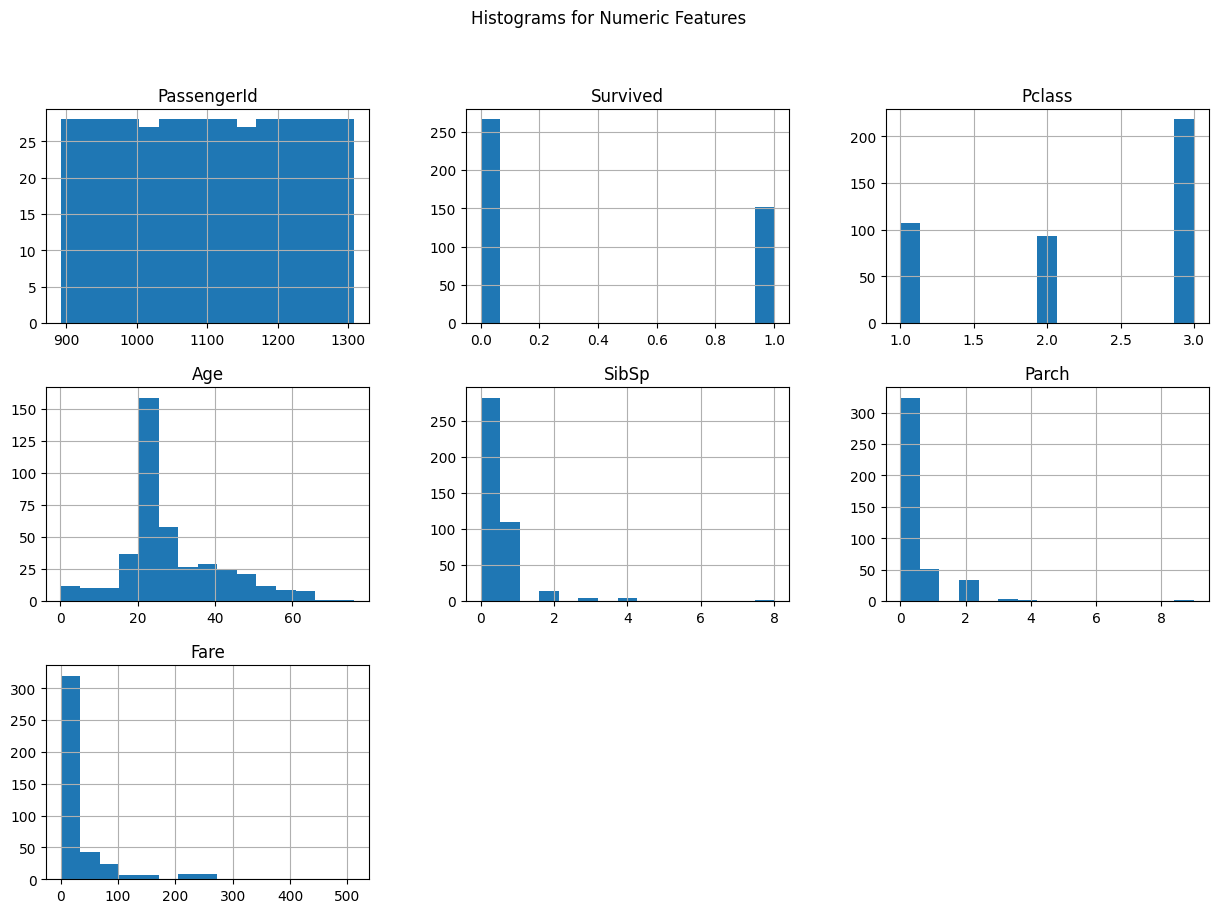

In [30]:
# Histogram for numerical variables
df.select_dtypes(include=np.number).hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms for Numeric Features")
plt.show()


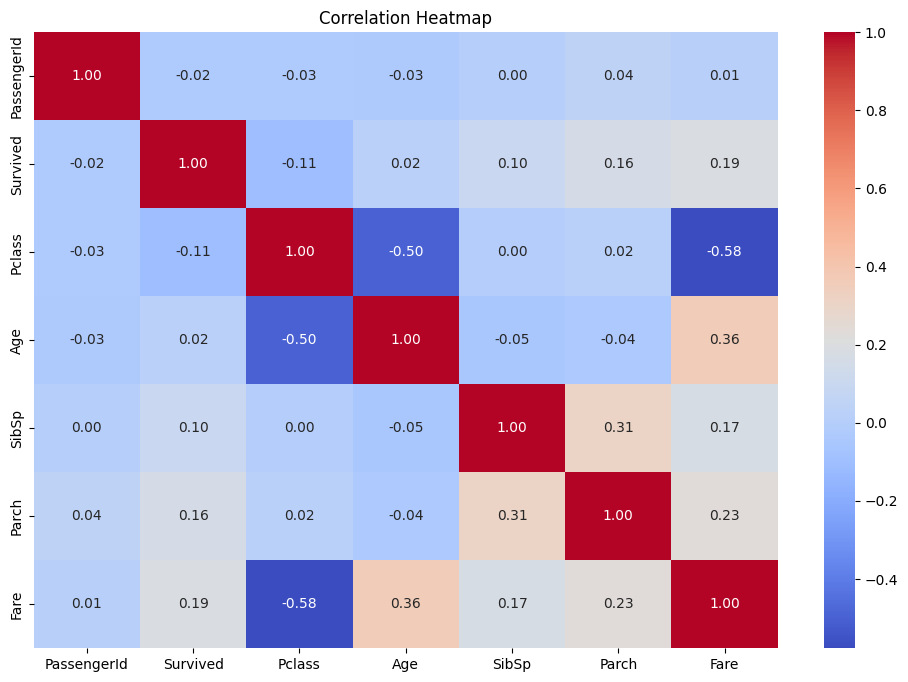

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
